## 세종시 동별 아파트 가격지수 분석 
### 가격지수계산법 : (월별거래금액/월별거래량)*100

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from pandas_datareader import data 
import re  

### 세종시 아파트 가격지수 분석 

In [5]:
df_apt=pd.read_csv('./Data/3.세종시_아파트(매매)_실거래가.csv',thousands = ',')
df_apt['count']=1
df_apt=df_apt[['계약년월','계약일','시군구','단지명','거래금액(만원)','count']]
df_apt[['거래금액(만원)','count']].astype(int) 
df_apt

,계약년월,계약일,시군구,단지명,거래금액(만원),count
0,201701,1,세종특별자치시 보람동,스타힐타워Ⅰ,8600,1
1,201701,1,세종특별자치시 종촌동,가재마을2단지,27300,1
2,201701,2,세종특별자치시 고운동,가락마을15단지(중흥파크뷰),32000,1
3,201701,2,세종특별자치시 고운동,가락마을8단지(고운뜰아파트),30500,1
4,201701,2,세종특별자치시 아름동,범지기마을7단지 호반에코시티,31300,1
...,...,...,...,...,...,...
23592,202012,31,세종특별자치시 조치원읍 신흥리,신흥대우푸르지오,50000,1
23593,202012,31,세종특별자치시 조치원읍 죽림리,조치원죽림자이,44000,1
23594,202012,31,세종특별자치시 종촌동,가재마을10단지,73500,1
23595,202012,31,세종특별자치시 종촌동,가재마을6단지,60000,1


In [6]:
df_apt[['거래금액(만원)','count']]=df_apt[['거래금액(만원)','count']].astype(int)
df_apt['계약년월']=df_apt['계약년월'].astype(str) 
df_apt_all=df_apt.groupby(['계약년월']).sum()  
df_apt_all=df_apt_all[['거래금액(만원)','count']].reset_index().rename({'count':
                                                            '거래량'},axis='columns')
df_apt_all['평균가격']=df_apt_all['거래금액(만원)']/df_apt_all['거래량'] 
df_apt_all['가격지수']=df_apt_all['평균가격'].shift(1).fillna(23792.207468879667 )
df_apt_all['가격지수']=(df_apt_all['평균가격']/23792.207468879667)*100
df_apt_all 

,계약년월,거래금액(만원),거래량,평균가격,가격지수
0,201701,5733922,241,23792.207469,100.000000
1,201702,7598570,327,23237.217125,97.667344
2,201703,8028550,329,24402.887538,102.566723
3,201704,8759187,338,25914.754438,108.921186
4,201705,14169390,480,29519.562500,124.072399
5,201706,24437952,783,31210.666667,131.180206
6,201707,18268108,557,32797.321364,137.849005
7,201708,6528612,251,26010.406375,109.323216
8,201709,4763510,192,24809.947917,104.277621
9,201710,4987742,183,27255.420765,114.556082


In [7]:
df_apt_all.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      48 non-null     object 
 1   거래금액(만원)  48 non-null     int32  
 2   거래량       48 non-null     int32  
 3   평균가격      48 non-null     float64
 4   가격지수      48 non-null     float64
dtypes: float64(2), int32(2), object(1)
memory usage: 1.6+ KB


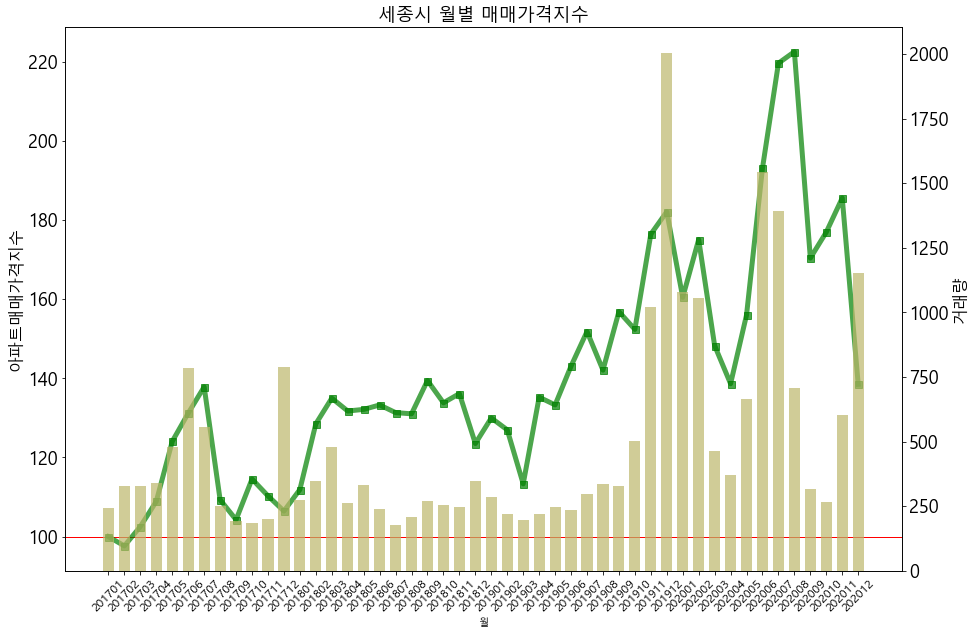

In [8]:
import matplotlib as mpl  

font_name = mpl.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.xticks(rotation=45,fontsize=12) 
plt.yticks(fontsize=18) 
plt.axhline(y=100, color='r', linewidth=1)
plt.grid(False)
ax.plot(df_apt_all['계약년월'], df_apt_all['가격지수'], '-s', label='매매가격지수', 
         color='green', markersize=7, linewidth=5, alpha=0.7)
ax.set_xlabel('월')
ax.set_ylabel('아파트매매가격지수',fontsize=16)

ax1 = ax.twinx()
plt.yticks(fontsize=18)  
ax1.bar(df_apt_all['계약년월'], df_apt_all['거래량'], 
        color='darkkhaki', label='거래량', alpha=0.7, width=0.7)
ax1.set_ylabel('거래량',fontsize=16)
plt.grid(False) 
plt.title('세종시 월별 매매가격지수',fontsize=18)
plt.show()

### 세종시 동별 아파트 가격지수 분석  
- 새롬동, 도담동, 고운동, 고운동 

In [9]:
df_apt.groupby(['시군구']).sum().head() 

,계약일,거래금액(만원),count
시군구,,,
세종특별자치시 가람동,12,54000,1
세종특별자치시 고운동,47824,97087037,2936
세종특별자치시 금남면 용포리,8983,8176240,576
세종특별자치시 나성동,8271,5523685,525
세종특별자치시 다정동,13956,51679693,858


In [10]:
jong=df_apt[df_apt['시군구']=='세종특별자치시 종촌동'] 
sae=df_apt[df_apt['시군구']=='세종특별자치시 새롬동'] 
do=df_apt[df_apt['시군구']=='세종특별자치시 도담동']
go=df_apt[df_apt['시군구']=='세종특별자치시 고운동']
go 

,계약년월,계약일,시군구,단지명,거래금액(만원),count
2,201701,2,세종특별자치시 고운동,가락마을15단지(중흥파크뷰),32000,1
3,201701,2,세종특별자치시 고운동,가락마을8단지(고운뜰아파트),30500,1
32,201701,7,세종특별자치시 고운동,이지더원(가락마을10단지),24500,1
46,201701,9,세종특별자치시 고운동,가락마을17단지(골드클래스),25100,1
47,201701,9,세종특별자치시 고운동,가락마을21단지(에듀포레),32250,1
...,...,...,...,...,...,...
23340,202012,26,세종특별자치시 고운동,가락마을5단지(유승한내들),51000,1
23341,202012,26,세종특별자치시 고운동,가락마을6단지(중흥S클래스프라디움),19475,1
23342,202012,26,세종특별자치시 고운동,가락마을8단지(고운뜰아파트),58300,1
23381,202012,28,세종특별자치시 고운동,가락마을 20단지(호반베르디움5차),70000,1


In [12]:
#고운동 가격지수 계산 
go[['거래금액(만원)','count']]=go[['거래금액(만원)','count']].astype(int)
go['계약년월']=go['계약년월'].astype(str)
go_all=go.groupby(['계약년월']).sum()  
go_all=go_all[['거래금액(만원)','count']].reset_index().rename({'count':
                                                            '거래량'},axis='columns')
go_all['평균가격']=go_all['거래금액(만원)']/go_all['거래량'] 
go_all['가격지수']=go_all['평균가격'].shift(1).fillna(28331.578947 )
go_all['가격지수']=(go_all['평균가격']/28331.578947)*100
go_all.head()  

C:\Users\mmqq2\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-12-92af2439f46b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  go['계약년월']=go['계약년월'].astype(str)


,계약년월,거래금액(만원),거래량,평균가격,가격지수
0,201701,538300,19,28331.578947,100.000000
1,201702,671000,25,26840.000000,94.735278
2,201703,680600,25,27224.000000,96.090656
3,201704,856770,31,27637.741935,97.551012
4,201705,1254150,45,27870.000000,98.370797


In [13]:
#종촌동 가격지수 계산 
jong[['거래금액(만원)','count']]=jong[['거래금액(만원)','count']].astype(int)
jong['계약년월']=jong['계약년월'].astype(str)
jong_all=jong.groupby(['계약년월']).sum()  
jong_all=jong_all[['거래금액(만원)','count']].reset_index().rename({'count':
                                                            '거래량'},axis='columns')
jong_all['평균가격']=jong_all['거래금액(만원)']/jong_all['거래량'] 
jong_all['가격지수']=jong_all['평균가격'].shift(1).fillna(31297.142857 )
jong_all['가격지수']=(jong_all['평균가격']/31297.142857)*100
jong_all 

C:\Users\mmqq2\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-13-a4b162786152>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jong['계약년월']=jong['계약년월'].astype(str)


,계약년월,거래금액(만원),거래량,평균가격,가격지수
0,201701,1095400,35,31297.142857,100.000000
1,201702,1305450,37,35282.432432,112.733717
2,201703,1080000,33,32727.272727,104.569522
3,201704,1588970,50,31779.400000,101.540898
4,201705,3560977,109,32669.513761,104.384972
5,201706,5637800,162,34801.234568,111.196203
6,201707,4411200,123,35863.414634,114.590060
7,201708,1085200,32,33912.500000,108.356536
8,201709,901800,26,34684.615385,110.823584
9,201710,793710,21,37795.714286,120.764104


In [14]:
#새롬동 가격지수 계산
sae[['거래금액(만원)','count']]=sae[['거래금액(만원)','count']].astype(int)
sae['계약년월']=sae['계약년월'].astype(str) 
sae_all=sae.groupby(['계약년월']).sum()  
sae_all=sae_all[['거래금액(만원)','count']].reset_index().rename({'count':
                                                            '거래량'},axis='columns')
sae_all['평균가격']=sae_all['거래금액(만원)']/sae_all['거래량'] 
sae_all['가격지수']=sae_all['평균가격'].shift(1).fillna(42111.000000 )
sae_all['가격지수']=(sae_all['평균가격']/42111.000000)*100
sae_all 

C:\Users\mmqq2\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-14-f5fb60670942>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sae['계약년월']=sae['계약년월'].astype(str)


,계약년월,거래금액(만원),거래량,평균가격,가격지수
0,201706,84222,2,42111.000000,100.000000
1,201707,147288,3,49096.000000,116.587115
2,201708,150900,3,50300.000000,119.446225
3,201709,208800,5,41760.000000,99.166489
4,201710,100632,2,50316.000000,119.484220
5,201711,62600,2,31300.000000,74.327373
6,201712,166700,4,41675.000000,98.964641
7,201801,210200,4,52550.000000,124.789247
8,201802,281800,6,46966.666667,111.530637
9,201803,433900,9,48211.111111,114.485790


In [15]:
#도담동 가격지수 계산 
do[['거래금액(만원)','count']]=do[['거래금액(만원)','count']].astype(int)
do['계약년월']=do['계약년월'].astype(str) 
do_all=do.groupby(['계약년월']).sum()  
do_all=do_all[['거래금액(만원)','count']].reset_index().rename({'count':
                                                            '거래량'},axis='columns')
do_all['평균가격']=do_all['거래금액(만원)']/do_all['거래량'] 
do_all['가격지수']=do_all['평균가격'].shift(1).fillna(31855.217391 )
do_all['가격지수']=(do_all['평균가격']/31855.217391)*100
do_all 

C:\Users\mmqq2\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-15-6071fbb6ead4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  do['계약년월']=do['계약년월'].astype(str)


,계약년월,거래금액(만원),거래량,평균가격,가격지수
0,201701,732670,23,31855.217391,100.000000
1,201702,924350,31,29817.741935,93.603951
2,201703,1110500,30,37016.666667,116.202838
3,201704,1004127,30,33470.900000,105.071956
4,201705,2774980,78,35576.666667,111.682385
5,201706,4035680,108,37367.407407,117.303884
6,201707,2805660,68,41259.705882,129.522600
7,201708,445695,15,29713.000000,93.275144
8,201709,278270,10,27827.000000,87.354607
9,201710,429320,13,33024.615385,103.670978


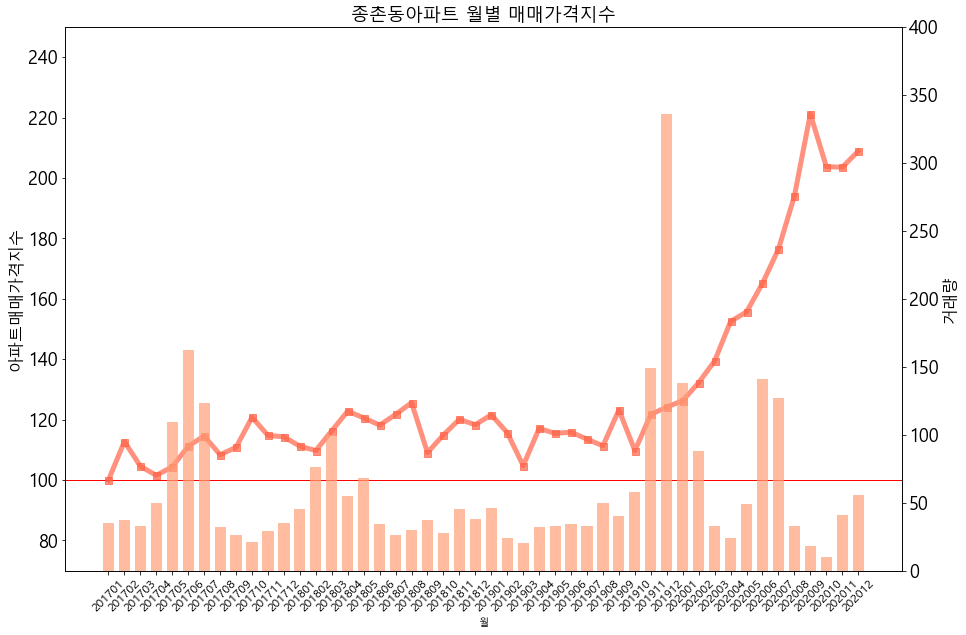

In [16]:
#종촌동 가격지수 그래프 출력 

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.xticks(rotation=45,fontsize=12) 
plt.yticks(fontsize=18) 
plt.ylim([70,250]) 
plt.axhline(y=100, color='r', linewidth=1)
plt.grid(False)
ax.plot(jong_all['계약년월'], jong_all['가격지수'], '-s', label='매매가격지수', 
         color='tomato', markersize=7, linewidth=5, alpha=0.7)
ax.set_xlabel('월')
ax.set_ylabel('아파트매매가격지수',fontsize=16) 

ax1 = ax.twinx()
plt.yticks(fontsize=18)  
ax1.bar(jong_all['계약년월'], jong_all['거래량'], 
        color='lightsalmon', label='거래량', alpha=0.7, width=0.7)
ax1.set_ylabel('거래량',fontsize=16)
plt.title('종촌동아파트 월별 매매가격지수',fontsize=18)
plt.grid(False) 
plt.ylim([0,400])
plt.show()

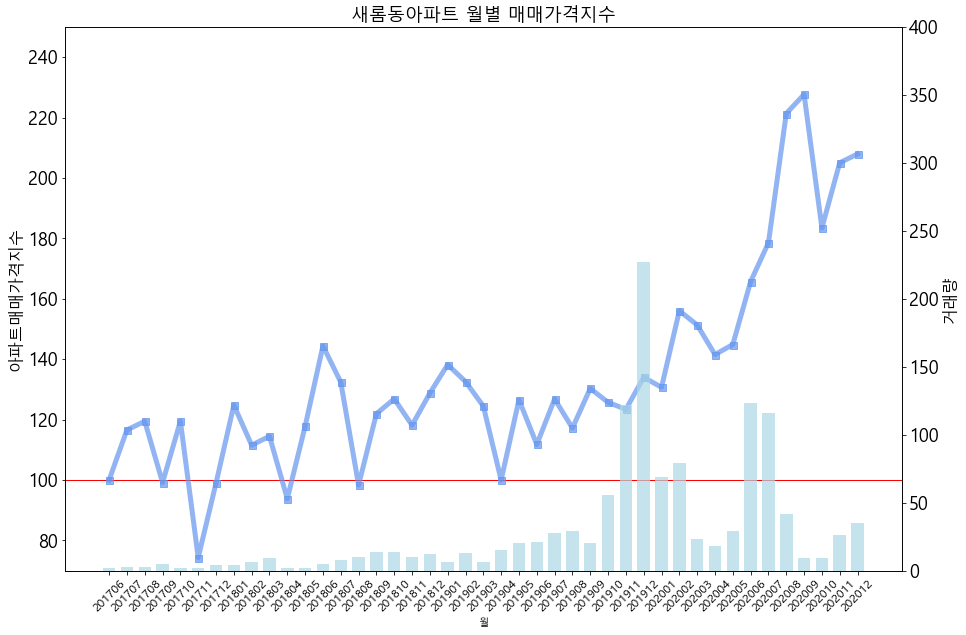

In [17]:
#새롬동 가격지수 그래프 출력 

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.xticks(rotation=45,fontsize=12) 
plt.yticks(fontsize=18) 
plt.ylim([70,250]) 
plt.axhline(y=100, color='r', linewidth=1)
plt.grid(False)
ax.plot(sae_all['계약년월'], sae_all['가격지수'], '-s', label='매매가격지수', 
         color='cornflowerblue', markersize=7, linewidth=5, alpha=0.7)
ax.set_xlabel('월')
ax.set_ylabel('아파트매매가격지수',fontsize=16) 

ax1 = ax.twinx()
plt.yticks(fontsize=18)  
ax1.bar(sae_all['계약년월'], sae_all['거래량'], 
        color='lightblue', label='거래량', alpha=0.7, width=0.7)
ax1.set_ylabel('거래량',fontsize=16)
plt.title('새롬동아파트 월별 매매가격지수',fontsize=18)
plt.ylim([0,400])
plt.grid(False) 
plt.show()

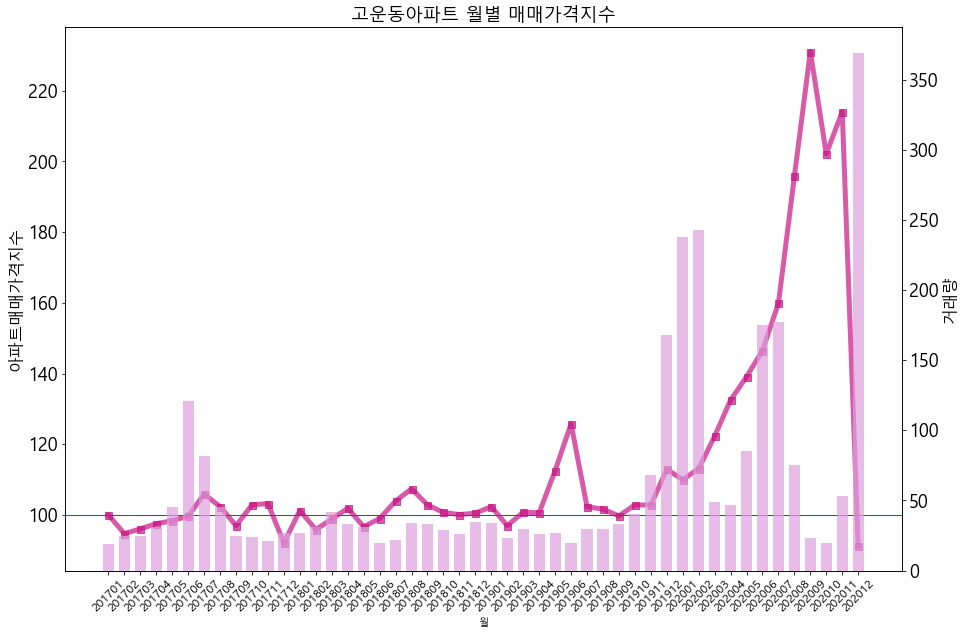

In [18]:
#고운동 가격지수 그래프 출력 

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.xticks(rotation=45,fontsize=12) 
plt.yticks(fontsize=18) 
plt.axhline(y=100, color='r', linewidth=1)
plt.grid(False)
ax.plot(go_all['계약년월'], go_all['가격지수'], '-s', label='매매가격지수', 
         color='mediumvioletred', markersize=7, linewidth=5, alpha=0.7)
ax.set_xlabel('월')
ax.set_ylabel('아파트매매가격지수',fontsize=16) 

ax1 = ax.twinx()
plt.yticks(fontsize=18)  
ax1.bar(go_all['계약년월'], go_all['거래량'], 
        color='plum', label='거래량', alpha=0.7, width=0.7)
ax1.set_ylabel('거래량',fontsize=16)
plt.title('고운동아파트 월별 매매가격지수',fontsize=18)
plt.grid(False) 
plt.show()
##고운동  

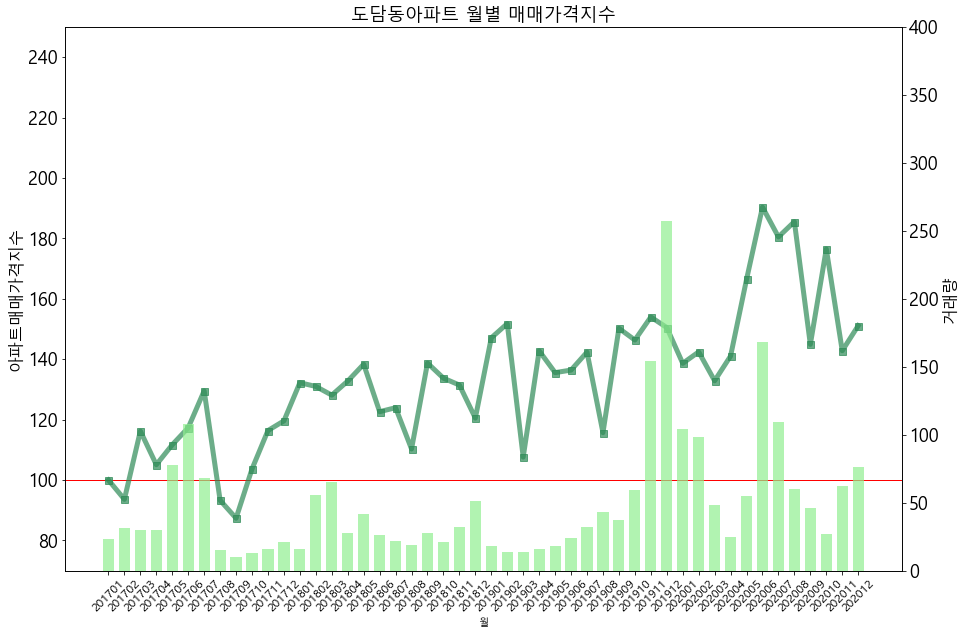

In [19]:
#도담 가격지수 그래프 출력 

plt.rcParams['figure.figsize'] = (15, 10)
fig, ax = plt.subplots()  
plt.xticks(rotation=45,fontsize=12) 
plt.yticks(fontsize=18) 
plt.ylim([70,250])
plt.axhline(y=100, color='r', linewidth=1)
plt.grid(False) 
ax.plot(do_all['계약년월'], do_all['가격지수'], '-s', label='매매가격지수', 
         color='seagreen',markersize=7, linewidth=5, alpha=0.7)
ax.set_xlabel('월')
ax.set_ylabel('아파트매매가격지수',fontsize=16) 

ax1 = ax.twinx()
plt.yticks(fontsize=18)  
ax1.bar(do_all['계약년월'], do_all['거래량'], 
        color='lightgreen', label='거래량', alpha=0.7, width=0.7)
ax1.set_ylabel('거래량',fontsize=16)
plt.title('도담동아파트 월별 매매가격지수',fontsize=18)
plt.grid(False) 
plt.ylim([0,400])
plt.show()